## Observations and Insights 

Three Observations:
1. Ramicane drug treatment has shown the best results in reducing the tumor volume. 
2. There was no evidence to show that the treatment is more effective for male or female mice. 
3. Mouse ID S185 showed a 51.86% reduction in tumor volume after treatment. 

In [586]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem
from sklearn import datasets
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

combined_mouse_results_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID')
combined_mouse_results_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [587]:
# Checking the number of mice.
mice_count = len(combined_mouse_results_df["Mouse ID"])
mice_count

1893

In [588]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_results_df.loc[combined_mouse_results_df.duplicated(["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [589]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df =  combined_mouse_results_df[combined_mouse_results_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [590]:
drug_regimen_df = clean_data_df["Drug Regimen"].unique()
drug_regimen_df

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [591]:
# Checking the number of mice in the clean DataFrame.
number_mice= len(clean_data_df["Mouse ID"])
number_mice

1880

In [592]:
drop_duplicate_df = clean_data_df.drop_duplicates(subset=['Mouse ID'])
drop_duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [593]:
total_mice = drop_duplicate_df["Drug Regimen"].value_counts()
total_mice

Placebo      25
Ceftamin     25
Zoniferol    25
Capomulin    25
Infubinol    25
Ramicane     25
Naftisol     25
Ketapril     25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

## Summary Statistics

In [594]:
#Finding the average number of the tumor volume
tumor_volume_mean = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_volume_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [595]:
tumor_volume_median = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [596]:
standard_deviation = clean_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
standard_deviation

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [597]:
variance = clean_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [598]:
standard_error = clean_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
standard_error

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [599]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics_df = pd.DataFrame({"Mean": tumor_volume_mean, 
                                    "Median": tumor_volume_median,
                                    "Variance": variance,
                                    "Standard Variance": standard_deviation,   
                                    "Standard Error": standard_error})


In [600]:
summary_statistics_df.round(2)

,Mean,Median,Variance,Standard Variance,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [601]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Regimen = ['Capomulin','Ceftamin', 'Naftisol', 'Placebo', 'Ramicane', 
       'Zoniferol','Ketapril', 'Infubinol','Propriva','Stelasyn']
number_mice = [5,10,15,20,25,30]
x_axis = np.arange(len(Regimen))

([<matplotlib.axis.XTick at 0x152527e6c40>,
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Naftisol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ramicane'),
  Text(5, 0, 'Zoniferol'),
  Text(6, 0, 'Ketapril'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Stelasyn')])

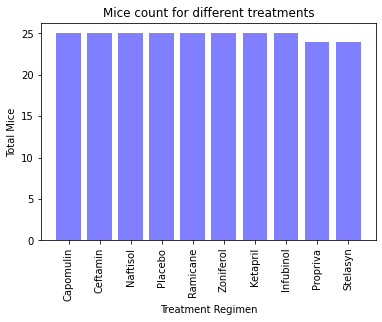

In [1047]:
plt.bar(x_axis, total_mice, color="b", alpha=0.5, align="center")
plt.title("Mice count for different treatments")
plt.ylabel("Total Mice")
plt.xlabel("Treatment Regimen")

Regimen = [value for value in x_axis]
plt.xticks(Regimen,['Capomulin','Ceftamin', 'Naftisol', 'Placebo', 'Ramicane', 
       'Zoniferol','Ketapril', 'Infubinol','Propriva','Stelasyn'], rotation="vertical")

In [1048]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

total_mice = drop_duplicate_df["Drug Regimen"].value_counts()
total_mice 

Placebo      25
Ceftamin     25
Zoniferol    25
Capomulin    25
Infubinol    25
Ramicane     25
Naftisol     25
Ketapril     25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

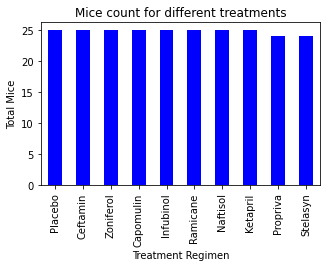

<Figure size 432x288 with 0 Axes>

In [1049]:
# Use DataFrame.plot() in order to create a bar chart of the data
total_mice .plot(kind="bar", figsize=(5,3),  color="b")

# Set a title for the chart
plt.title("Mice count for different treatments")
plt.ylabel("Total Mice")
plt.xlabel("Treatment Regimen")

plt.show()
plt.tight_layout()

In [1352]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Mice_gender = drop_duplicate_df.groupby(['Sex'])

# Create a new variable that holds the sum of our groups
sum_gender = Mice_gender["Mouse ID"].count()
sum_gender.head()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

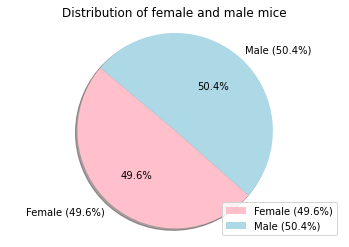

In [1417]:
gender = ['Female (49.6%)', 'Male (50.4%)']
gender_count = [123, 125]
colors = ["Pink", "lightblue"]
explode =(0,0)

plt.pie(gender_count, explode=explode, labels=gender, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Distribution of female and male mice")
plt.legend (gender, loc="lower right")
plt.show()


In [1418]:
# Tell matplotlib to create a pie chart based upon the above data
# Generate a pie plot showing the distribution of female versus male mice using pyplot


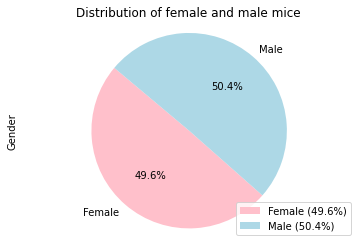

In [1419]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ['Female (49.6%)', 'Male (50.4%)']
colours = ["pink", 'lightblue']
gender_pie = sum_gender.plot(kind="pie", y='Gender', title=("Distribution of female and male mice"), startangle = 140, colors = colours, autopct="%1.1f%%" )
gender_pie.set_ylabel("Gender")
plt.axis("equal")
plt.legend (labels, loc="lower right")
plt.show()



## Quartiles, Outliers and Boxplots

In [1420]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [1421]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

In [1422]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem
from sklearn import datasets
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
combined_mouse_results_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID')
duplicate_mice = combined_mouse_results_df.loc[combined_mouse_results_df.duplicated(["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
clean_data_df =  combined_mouse_results_df[combined_mouse_results_df['Mouse ID'].isin(duplicate_mice)==False]
treatment_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin") | (clean_data_df["Drug Regimen"] == "Ramicane") | (clean_data_df["Drug Regimen"] == "Infubinol") | (clean_data_df["Drug Regimen"] == "Ceftamin"), :]
new_data_df= treatment_df.drop_duplicates(subset=['Mouse ID','Drug Regimen'], keep='last')
new_data_df.sort_values("Timepoint", ascending = False)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
800,e476,Infubinol,Male,23,26,45,62.435404,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
370,s710,Capomulin,Female,1,23,45,40.728578,1
380,l509,Capomulin,Male,17,21,45,41.483008,3
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0


In [1423]:
Ramicane = new_data_df.loc[new_data_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
Ramicane

9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
262    36.561652
272    37.311236
289    38.342008
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
447    43.419381
449    43.166373
453    44.183451
Name: Tumor Volume (mm3), dtype: float64

In [1424]:
quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq - lowerq, 2)

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56165229 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [1425]:
Capomulin = new_data_df.loc[new_data_df['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
Capomulin

19      23.343598
29      28.484033
39      28.430964
64      30.485985
104     31.023923
124     31.896238
134     32.377357
144     33.329098
164     34.455298
204     37.311846
224     36.041047
244     37.074024
282     38.846876
299     38.939633
309     38.982878
317     38.753265
337     38.125164
340     39.952347
350     40.658124
360     40.159220
370     40.728578
380     41.483008
390     41.581521
440     47.685963
1455    46.539206
Name: Tumor Volume (mm3), dtype: float64

In [1426]:
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq - lowerq, 2)

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.1251644 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [1427]:
Infubinol = new_data_df.loc[new_data_df['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)']
Infubinol

463     67.973419
473     65.525743
530     57.031862
540     66.083066
637     72.226731
669     36.321346
742     60.969711
800     62.435404
834     60.918767
949     67.289621
1053    66.196912
1076    62.117279
1205    47.010364
1225    60.165180
1312    55.629428
1314    45.699331
1397    54.656549
1485    55.650681
1616    46.250112
1632    54.048608
1640    51.542431
1683    50.005138
1726    58.268442
1813    67.685569
1872    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [1428]:
quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq - lowerq, 2)

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16518046 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [1429]:
Ceftamin = new_data_df.loc[new_data_df['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)']
Ceftamin

493     62.999356
594     45.000000
600     56.057749
617     55.742829
840     48.722078
940     47.784682
993     61.849023
1033    68.923185
1112    67.748662
1119    57.918381
1122    46.784535
1132    59.851956
1162    64.299830
1260    59.741901
1379    61.433892
1406    64.192341
1551    45.000000
1582    52.925348
1583    45.000000
1670    67.527482
1743    45.000000
1773    64.634949
1797    61.386660
1845    68.594745
1855    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [1430]:
quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25].round(2)
upperq = quartiles[0.75].round(2)
iqr = round(upperq - lowerq, 2)

lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85195552 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


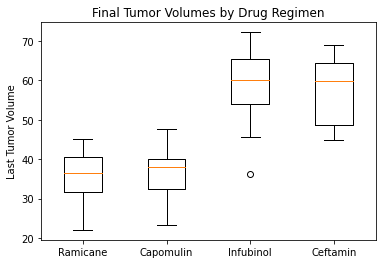

In [1431]:
Ramicane = new_data_df.loc[new_data_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
Capomulin = new_data_df.loc[new_data_df['Drug Regimen'] == 'Capomulin','Tumor Volume (mm3)']
Infubinol = new_data_df.loc[new_data_df['Drug Regimen'] == 'Infubinol','Tumor Volume (mm3)']
Ceftamin = new_data_df.loc[new_data_df['Drug Regimen'] == 'Ceftamin','Tumor Volume (mm3)']

plt.title('Final Tumor Volumes by Drug Regimen')
plt.ylabel('Last Tumor Volume')
drugname = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
plt.boxplot([Ramicane, Capomulin, Infubinol, Ceftamin], labels=drugname)
plt.show()

## Line and Scatter Plots

In [1432]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_treatment_df = clean_data_df.loc[(clean_data_df["Drug Regimen"] == "Capomulin")]
Capomulin_s185 = Capomulin_treatment_df.loc[Capomulin_treatment_df["Mouse ID"] == "s185"]
Capomulin_s185


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


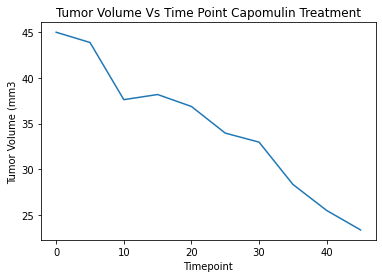

In [1433]:
plt.plot(Capomulin_s185.iloc[:,5],Capomulin_s185.iloc[:,6])
plt.title('Tumor Volume Vs Time Point Capomulin Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3')
plt.show()

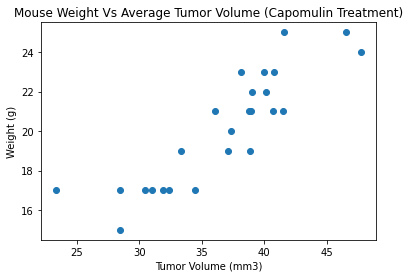

In [1434]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_treatment = new_data_df.loc[new_data_df['Drug Regimen'] == 'Capomulin']
plt.scatter(Capomulin_treatment.iloc[:,6],Capomulin_treatment.iloc[:,4])
plt.title('Mouse Weight Vs Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

## Correlation and Regression

In [1435]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [1436]:
Tumorvol = Capomulin_treatment.iloc[:,6]
Weight = Capomulin_treatment.iloc[:,4]
correlation = st.pearsonr(Tumorvol, Weight)
print(f"The correlation coefficient between mouse weight and average tumor volume for Capomulin treatment is {round(correlation[0],2)}")


The correlation coefficient between mouse weight and average tumor volume for Capomulin treatment is 0.88


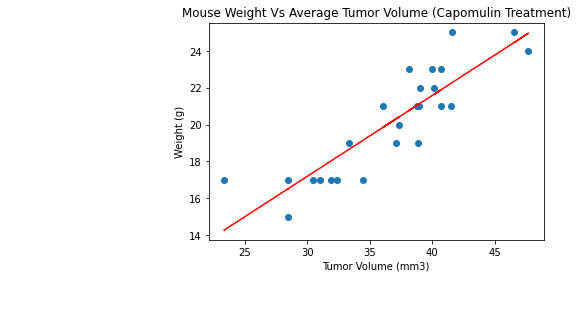

In [1437]:
x_values = Capomulin_treatment.iloc[:,6]
y_values = Capomulin_treatment.iloc[:,4]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Mouse Weight Vs Average Tumor Volume (Capomulin Treatment)')
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()